In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv("april2016.csv/april2016.csv")
print(data.head())

    Id  Speed  TravelTime  Status       DataAsOf   linkId
0  169  57.17         162       0  4/1/2016 0:05  4616355
1  170  55.92          67       0  4/1/2016 0:05  4616356
2  171  14.91         807       0  4/1/2016 0:05  4616357
3  172  54.06          79       0  4/1/2016 0:05  4616310
4  177  54.06          80       0  4/1/2016 0:05  4616309


In [19]:
data["DataAsOf"]=pd.to_datetime(data["DataAsOf"])

In [21]:
print(data.Speed.unique())
print(max(data.Speed))
print(min(data.Speed))
print(max(data.Speed)-min(data.Speed))

[  57.17   55.92   14.91   54.06   49.71   59.03   47.22   52.2    42.87
   60.27    8.08   57.79   60.89   52.82   39.15    8.7    45.98   47.85
   31.07   44.12   44.74   62.14   49.09   18.02   55.3    39.77   34.18
   19.88   26.1    22.99   37.9    32.93   41.01   34.8    13.05   64.
   50.95    3.11    1.86    3.73   29.2    65.24   31.69   42.25   16.78
   24.23   14.29   19.26   36.04   37.28    9.94   29.83   16.16   24.85
   21.13    6.84   21.75   27.96    6.21   62.76   26.72   11.81   65.87
    4.97   67.11   67.73   11.18   75.19    1.24  113.71    0.     72.08
   68.97   82.02   70.21  165.91  150.99  186.41   78.91   90.72   72.7
  134.84  136.08  172.74   73.94   83.89   70.84   88.23  126.76   85.75
   88.86   80.78  124.27  109.98   80.16  103.15   91.96   86.99  142.92
  175.23   85.13  134.22  165.28  152.24   75.81  108.12  167.15  159.07
  101.9   183.3   180.2   101.28  164.04  111.85  103.77  147.26  114.95
  154.1   169.01  182.06  139.81   77.05   93.21  139.

In [23]:
#Speed data varies a lot. As we know on highways is 65mph in most states in US the speeds abovre 65 are high and below 65 low
speed_type=""
def speed_function(data_speed):

    if(data_speed >= 65.0):
        speed_type= 0
    else :
        speed_type=1
    return speed_type
       
data["Speed_Type"]= data["Speed"].apply(speed_function)
print(data["Speed_Type"].value_counts())

1    1039241
0       9334
Name: Speed_Type, dtype: int64


In [24]:
data["Speed_Type"].value_counts()

1    1039241
0       9334
Name: Speed_Type, dtype: int64

               Speed  TravelTime
Speed       1.000000   -0.471655
TravelTime -0.471655    1.000000


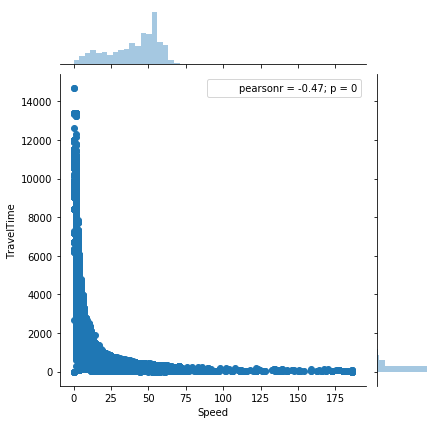

In [25]:
%matplotlib inline
import matplotlib.style as style
#style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
print (data[["Speed","TravelTime"]].corr())
plt.figure(figsize=(15,10))
sns.jointplot(x='Speed', y='TravelTime', data=data)

In [26]:
data["DataAsOf"].head()

0   2016-04-01 00:05:00
1   2016-04-01 00:05:00
2   2016-04-01 00:05:00
3   2016-04-01 00:05:00
4   2016-04-01 00:05:00
Name: DataAsOf, dtype: datetime64[ns]

In [27]:
def getday(x):
    return day_order[x-1]

In [28]:
import datetime
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data["date"] = [datetime.datetime.date(d) for d in data['DataAsOf']]
data["date"] = pd.to_datetime(data["date"])
print(data["date"].head())
#sns.barplot(x="Speed",y="DataAsOf",data=data)

0   2016-04-01
1   2016-04-01
2   2016-04-01
3   2016-04-01
4   2016-04-01
Name: date, dtype: datetime64[ns]


In [29]:
import datetime as dt
data['day'] = data['date'].dt.dayofweek.apply(getday)

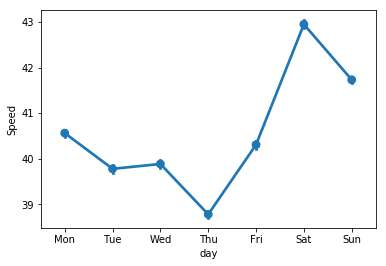

In [30]:
sns.pointplot(x='day',y='Speed',data=data,order=day_order)

In [31]:
count_primary = data.groupby( ["day","Speed"]).size().reset_index(name="Count")
highest_speed = count_primary[count_primary.groupby(['day'])['Speed'].transform(max)== count_primary['Speed']]
lowest_speed = count_primary[count_primary.groupby(['day'])['Speed'].transform(min)== count_primary['Speed']]
print(count_primary)
print (highest_speed)
print (lowest_speed)

     day   Speed  Count
0    Fri    0.00     33
1    Fri    1.24     92
2    Fri    1.86    527
3    Fri    3.11    955
4    Fri    3.73    722
5    Fri    4.97    814
6    Fri    6.21    908
7    Fri    6.84    683
8    Fri    8.08    645
9    Fri    8.70    838
10   Fri    9.94    767
11   Fri   11.18   1368
12   Fri   11.81   1439
13   Fri   13.05   1724
14   Fri   14.29   1818
15   Fri   14.91   1268
16   Fri   16.16   1293
17   Fri   16.78   1304
18   Fri   18.02   1351
19   Fri   19.26   1308
20   Fri   19.88   1462
21   Fri   21.13   1006
22   Fri   21.75   1097
23   Fri   22.99   1514
24   Fri   24.23   1163
25   Fri   24.85    900
26   Fri   26.10   1129
27   Fri   26.72   1244
28   Fri   27.96   1495
29   Fri   29.20   1693
..   ...     ...    ...
656  Wed   68.97     18
657  Wed   70.21     17
658  Wed   70.84      2
659  Wed   72.08      4
660  Wed   72.70      2
661  Wed   73.94      9
662  Wed   75.19      1
663  Wed   75.81      2
664  Wed   77.05      6
665  Wed   80.78

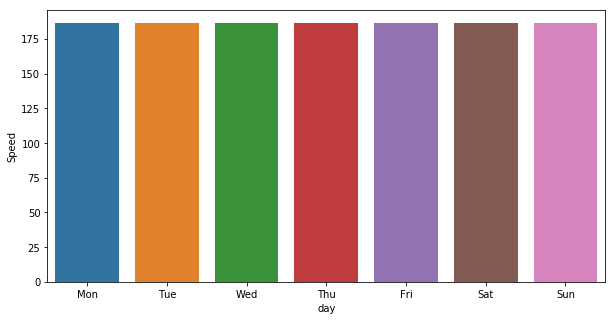

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='Speed',data=highest_speed,order=day_order)

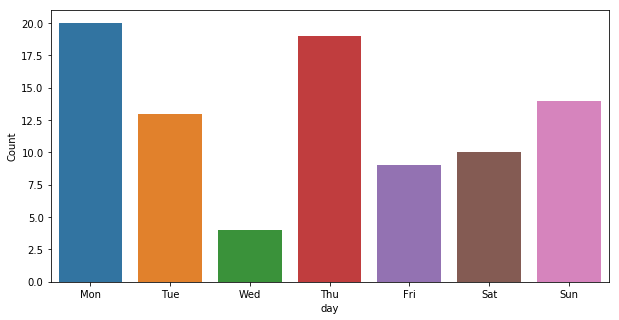

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='Count',data=highest_speed,order=day_order)

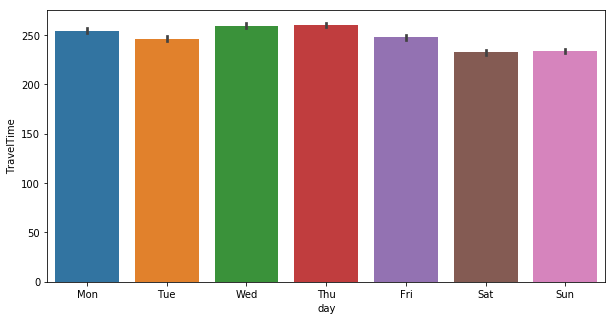

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='TravelTime',data=data,order=day_order)

In [35]:
count_primary = data.groupby( ["day","TravelTime"]).size().reset_index(name="Count")
highest_travel = count_primary[count_primary.groupby(['day'])['TravelTime'].transform(max)== count_primary['TravelTime']]
print(count_primary.head())
print (highest_travel)

   day  TravelTime  Count
0  Fri           6      3
1  Fri           8      2
2  Fri           9      6
3  Fri          10      4
4  Fri          12      4
       day  TravelTime  Count
1913   Fri       12023     25
4461   Mon       13402     10
6671   Sat       13399      5
9132   Sun       11899      1
11322  Thu       11562      7
13552  Tue       14671      2
15976  Wed       10801     13


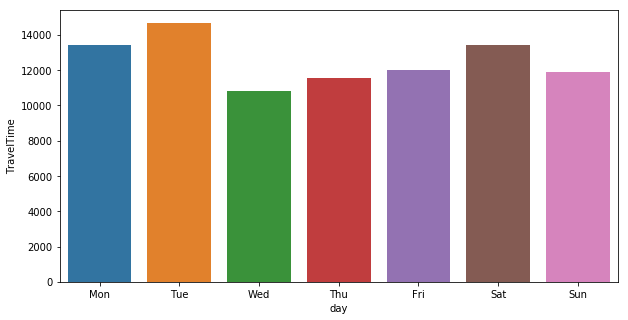

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='TravelTime',data=highest_travel,order=day_order)

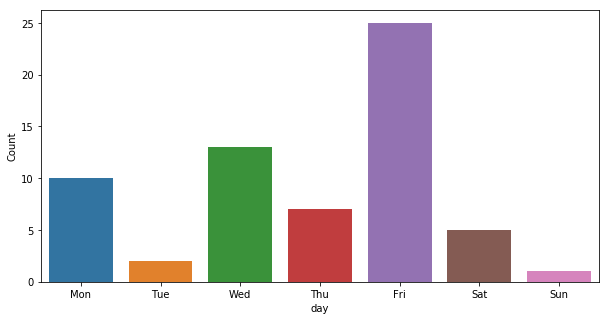

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='Count',data=highest_travel,order=day_order)

In [38]:
link = data.groupby( ["linkId","TravelTime"]).size().reset_index(name="Count")
print(data["linkId"].unique())
print (link)

[4616355 4616356 4616357 4616310 4616309 4616297 4616253 4616267 4620332
 4620331 4620310 4616351 4616320 4616352 4616350 4362250 4362244 4456450
 4616329 4616328 4616333 4616332 4616341 4616318 4616220 4616223 4616226
 4616319 4763657 4620298 4616250 4456498 4616365 4616364 4456516 4362249
 4362251 4329473 4329507 4616337 4616325 4616324 4616338 4616323 4616281
 4456502 4456501 4616246 4616260 4456479 4456478 4616342 4616257 4616339
 4616340 4616235 4616229 4616232 4616271 4616252 4616266 4456497 4616305
 4616312 4456496 4620315 4329472 4616353 4616354 4620330 4620314 4456477
 4616196 4616210 4456511 4456510 4616193 4616195 4616197 4763650 4763648
 4616194 4616216 4616199 4616208 4616211 4616209 4616225 4456476 4456481
 4456452 4456505 4456506 4763656 4763652 4616218 4616219 4763651 4616205
 4616298 4616299 4616300 4616276 4616272 4616259 4616241 4616213 4616214
 4616215 4616212 4456483 4616261 4616247 4616255 4616198 4616202 4616203
 4616200 4329483 4616201 4456494 4620343 4616346 44

     day   linkId  Count
132  Fri  4763657    979
266  Mon  4763657   1162
399  Sat  4763657   1098
535  Sun  4763657   1220
671  Thu  4763657   1214
804  Tue  4763657   1166
937  Wed  4763657   1002


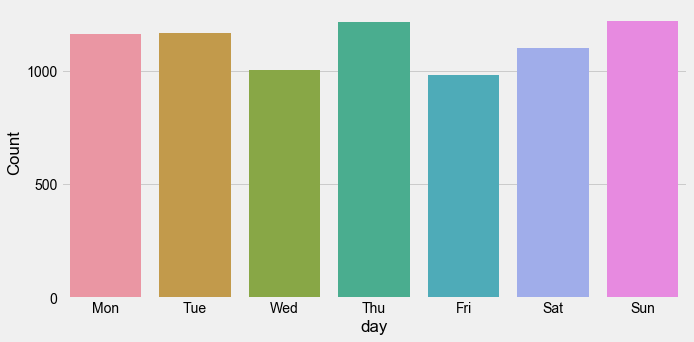

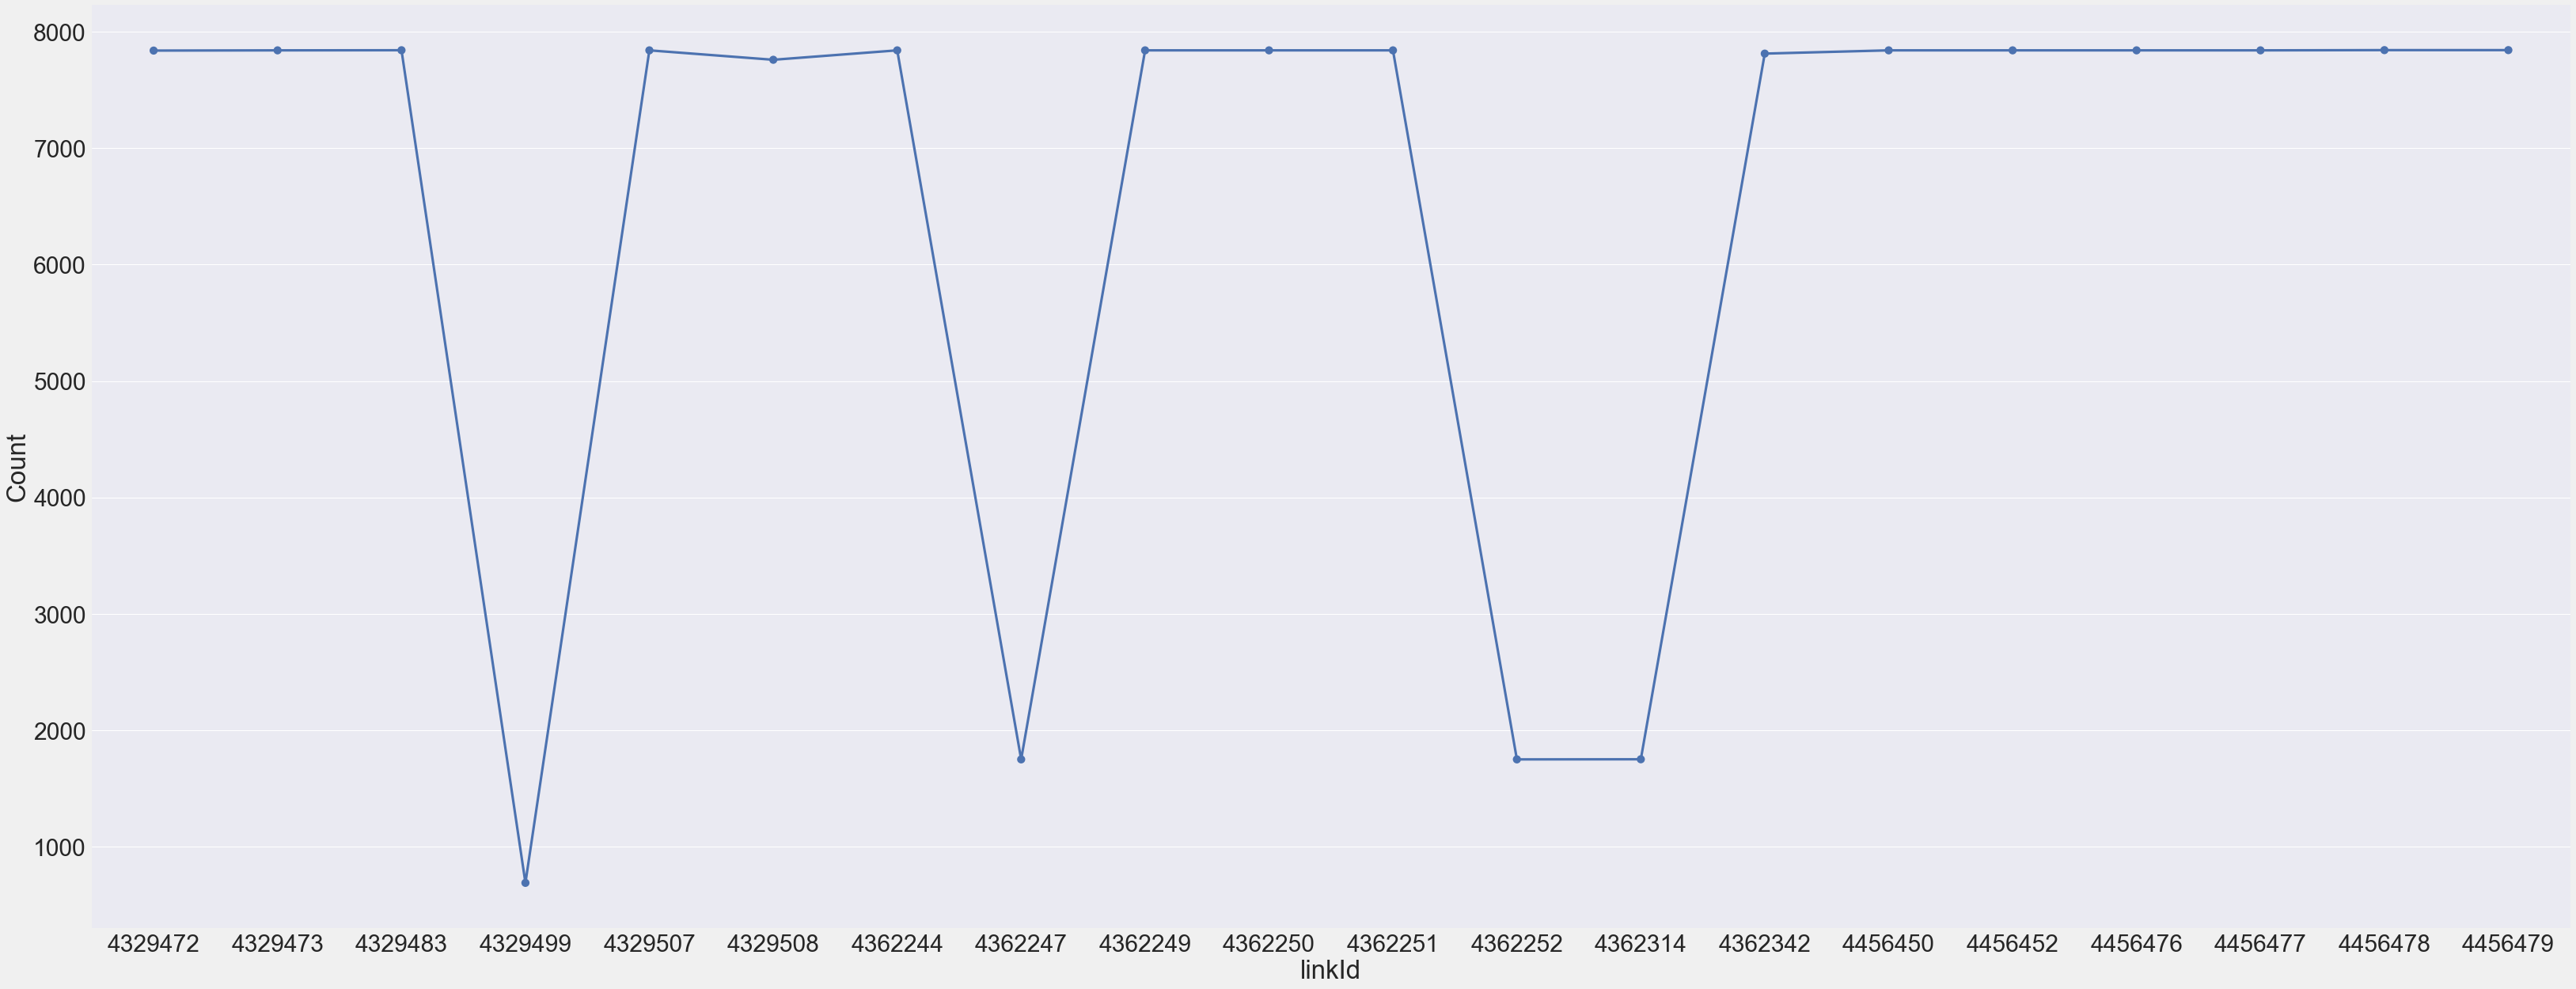

In [39]:
#Highest coordinates travelled to
import matplotlib.style as style
style.use('fivethirtyeight')
link_date = data.groupby( ["day","linkId"]).size().reset_index(name="Count")
highest_link = link_date[link_date.groupby(['day'])['linkId'].transform(max)== link_date['linkId']]
print(highest_link)
link =  data.groupby(["linkId"]).size().reset_index(name="Count")
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='Count',data=highest_link,order=day_order)
plt.figure(figsize=(50,20))
sns.set(font_scale=3)
sns.pointplot(x='linkId',y='Count',data=link[:20])

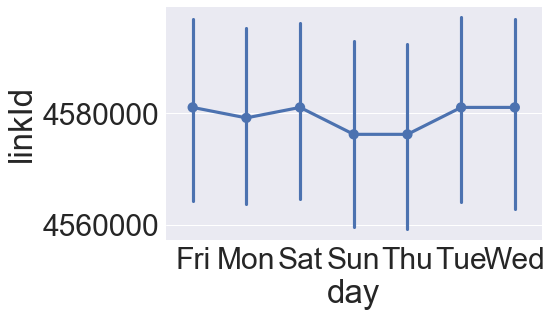

In [40]:
sns.pointplot(x='day',y='linkId',data=link_date)

In [41]:
data.head()

,Id,Speed,TravelTime,Status,DataAsOf,linkId,Speed_Type,date,day
0,169,57.17,162,0,2016-04-01 00:05:00,4616355,1,2016-04-01,Thu
1,170,55.92,67,0,2016-04-01 00:05:00,4616356,1,2016-04-01,Thu
2,171,14.91,807,0,2016-04-01 00:05:00,4616357,1,2016-04-01,Thu
3,172,54.06,79,0,2016-04-01 00:05:00,4616310,1,2016-04-01,Thu
4,177,54.06,80,0,2016-04-01 00:05:00,4616309,1,2016-04-01,Thu


In [43]:
#Predict travel time on the basis of speed
from sklearn.model_selection import train_test_split
predictors = data.drop(['Status','DataAsOf','date','day'], axis=1)
target = data["TravelTime"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 1)

In [44]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

34.85
